In [1]:
from copy import deepcopy
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt

In [32]:
def jacobian(a, b, r, theta, phi):
    a_ = a - r * theta
    b_ = b - r * phi
    J11 = -r * np.cos(theta) - a_ * np.sin(theta) + r * np.cos(theta)
    J12 = r * np.cos(phi) + b_ * np.sin(phi) - r * np.cos(phi)
    J21 = -r * np.sin(theta) + a_ * np.cos(theta) + r * np.sin(theta)
    J22 = r * np.sin(phi) - b_ * np.cos(phi) - r * np.sin(phi)
    return np.array([[J11, J21], [J12, J22]])

def f(a, b, r, d, theta, phi):
    a_ = a - r * theta
    b_ = b - r * phi
    fx = a_ * np.cos(theta) + r * np.sin(theta) - b_ * np.cos(phi) - r * np.sin(phi) - d
    fy = a_ * np.sin(theta) - r * np.cos(theta) - b_ * np.sin(phi) + r * np.cos(phi)
    return np.array([fx, fy])


In [3]:
try:
    de = np.linalg.inv(jacobian(10.0, 11.0, 0.05, np.pi/4, np.pi/4))
    print(de)
except:
    print(np.nan)

[[3.45630234e+15 3.14096729e+15]
 [3.45630234e+15 3.14096729e+15]]


In [34]:
# const
a = 10.0
b = 11.0
d = 2.0
r = 0.05
# initialize
theta = -np.pi / 4
phi = -np.pi / 4
psi = np.array([theta, phi])
# newton method
i = 0
err = 1.0
while(err > 0.1e-3):
    try:
        J = jacobian(a, b, r, psi[0], psi[1])
        delta = np.dot(np.linalg.inv(J), -f(a, b, r, d, psi[0], psi[1]))
        psi = psi + delta
    except:
        delta = np.nan        
    print(i, delta, psi)
    
    i = i + 1
    if (i > 30):
        break

0 [ 6.09114922e+15 -6.09114922e+15] [ 6.09114922e+15 -6.09114922e+15]
1 [-1.17490321  2.38721107] [ 6.09114922e+15 -6.09114922e+15]
2 [ 0.32789888 -0.63282949] [ 6.09114922e+15 -6.09114922e+15]
3 [0.18668272 0.26666661] [ 6.09114922e+15 -6.09114922e+15]
4 [0.18668272 0.26666661] [ 6.09114922e+15 -6.09114922e+15]
5 [0.18668272 0.26666661] [ 6.09114922e+15 -6.09114922e+15]
6 [0.18668272 0.26666661] [ 6.09114922e+15 -6.09114922e+15]
7 [0.18668272 0.26666661] [ 6.09114922e+15 -6.09114922e+15]
8 [0.18668272 0.26666661] [ 6.09114922e+15 -6.09114922e+15]
9 [0.18668272 0.26666661] [ 6.09114922e+15 -6.09114922e+15]
10 [0.18668272 0.26666661] [ 6.09114922e+15 -6.09114922e+15]
11 [0.18668272 0.26666661] [ 6.09114922e+15 -6.09114922e+15]
12 [0.18668272 0.26666661] [ 6.09114922e+15 -6.09114922e+15]
13 [0.18668272 0.26666661] [ 6.09114922e+15 -6.09114922e+15]
14 [0.18668272 0.26666661] [ 6.09114922e+15 -6.09114922e+15]
15 [0.18668272 0.26666661] [ 6.09114922e+15 -6.09114922e+15]
16 [0.18668272 0.266

<IPython.core.display.Javascript object>


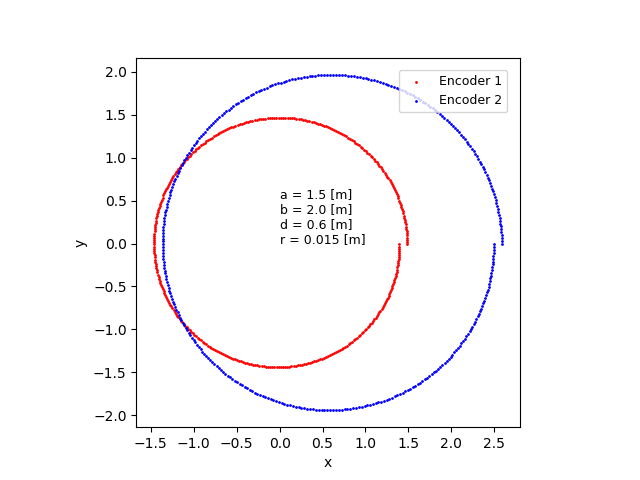

In [50]:
df = pd.DataFrame()
# theta [rad]
dt = np.pi / 180
df['theta'] = np.arange(0, 2 * np.pi + dt, dt)
# x, y
a = 1.5
b = 2.0
d = 0.6
r = 0.015
df['x1'] = (a - r * df.theta) * np.cos(df.theta) + r * np.sin(theta)
df['y1'] = (a - r * df.theta) * np.sin(df.theta) - r * np.cos(theta)
df['x2'] = (b - r * df.theta) * np.cos(df.theta) + r * np.sin(theta) + d
df['y2'] = (b - r * df.theta) * np.sin(df.theta) - r * np.cos(theta)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')
ax.scatter(df.x1, df.y1, s=1, c='red', label='Encoder 1')
ax.scatter(df.x2, df.y2, s=1, c='blue', label='Encoder 2')
ax.set_xlabel('x')
ax.set_ylabel('y')
comment = "a = %s [m]\nb = %s [m]\nd = %s [m]\nr = %s [m]" % (a, b, d, r)
ax.text(0, 0, comment, size=9, c="black")
ax.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=1, fontsize=9)
fig.savefig("a=%s[m]b=%s[m]d=%s[m]r=%s[m].png" % (a, b, d, r))
plt.show()

a,bは0.5～2m、dは0.6mくらい、rは15mmくらい